<a href="https://colab.research.google.com/github/bishram-acharya/hitachi_solution/blob/main/hitachi_solution_trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Hitachi Technergy: Energy Forecasting
In this notebook, we're going to predict the demand and price of energy for 7 days.

## 1. Problem Statement :
- Predict the demand of energy given its weather/environment data
- Predict the price of energy give past date data(hourly)

## 2. Data :
The data has been provided by Hitachi energy itself. There are three main datasets :
- Demand Forecasting Demand Data upto Feb 21.csv, which provides the hourly demand in MW.
- Demand Forecasting Weather Data upto Feb 28.csv, which provides hourly values of input features(independent variables).
- Price Forecasting data upto December 24.csv, which provides hourly values of energy prices

## 3. Features :
- Temperature: Represents the air temperature at a specific location in degree Farhenheit.

- Feels Like: Describes the perceived temperature by factoring in wind and humidity.

- Dewpoint: Indicates the temperature at which air becomes saturated, leading to dew formation.

- Humidity: Measures the amount of water vapor in the air, expressed as a percentage.

- Precipitation: Quantifies the amount of rain or snowfall in a specific period, measured in millimeters.

- Precipitation Probability: Represents the likelihood of precipitation occurring, expressed as a percentage.

- Precipitation Type: Identifies the type of precipitation, such as rain, snow, sleet, etc.

- Snowfall: Measures the amount of snowfall in a specific period, measured in millimeters.

- Snow Depth: Indicates the depth of accumulated snow on the ground, measured in centimeters.

- Wind Gust: Represents the maximum wind speed observed during a specific period, measured in meters per second.

- Wind Speed: Describes the average wind speed at a specific location, measured in meters per second.

- Wind Direction: Indicates the direction from which the wind is blowing, measured in degrees.

- Sea Level Pressure: Represents the atmospheric pressure at sea level, measured in hectopascals (hPa).

- Cloud Cover: Describes the fraction of the sky covered by clouds, expressed as a percentage.

- Visibility: Indicates the distance at which objects can be clearly seen, measured in kilometers.

- Solar Radiation: Represents the amount of solar energy received per unit area, measured in watts per square meter (W/m^2).

- UV Index: Measures the strength of ultraviolet (UV) radiation.

- Severe Risk: Represents the level of risk associated natural calamities.

- Conditions: Describes the overall weather conditions at a specific location.

## 4. Expected Output:
7 days forecast given the input features for demand and prices given past data






### Importing necessary libraries

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Exploratory Data Analysis

### Reading Data and simple insights

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# mounting


Mounted at /content/drive


In [3]:
# Importing Data with weather features
df=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv')
df_demand=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Demand Data upto Feb 21.csv')

In [4]:
df_price=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Price forecasting/Price Forecasting data upto December 24.csv')

In [5]:
df.head()

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Overcast,NaN,NaN,NaN,NaN,NaN
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Partially cloudy,NaN,NaN,NaN,NaN,NaN
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,9.9,0.0,0,NaN,Clear,NaN,NaN,NaN,NaN,NaN


In [6]:
# It seems that there are some unnecessary headerless columns. Dropping headerless columns that came with data:
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              27720 non-null  object 
 1   datetime          27720 non-null  object 
 2   Temperature       27720 non-null  float64
 3   feelslike         27720 non-null  float64
 4   dewpoint          27720 non-null  float64
 5   humidity          27720 non-null  float64
 6   precipitation     27720 non-null  float64
 7   precipprob        27720 non-null  int64  
 8   preciptype        2751 non-null   object 
 9   snow              27702 non-null  float64
 10  snowdepth         27702 non-null  float64
 11  windgust          12223 non-null  float64
 12  windspeed         27720 non-null  float64
 13  winddirection     27720 non-null  float64
 14  sealevelpressure  27702 non-null  float64
 15  cloudcover        27720 non-null  float64
 16  visibility        27702 non-null  float6

In [8]:
df_price.shape

(35352, 3)

In [9]:
df.head()

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions
0,Pokhara,1/1/2020 0:00,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
1,Pokhara,1/1/2020 1:00,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,...,NaN,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast
2,Pokhara,1/1/2020 2:00,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,...,NaN,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast
3,Pokhara,1/1/2020 3:00,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,...,NaN,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy
4,Pokhara,1/1/2020 4:00,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,...,NaN,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear


In [10]:
# Finding out the count of null values in each feature columns

df.isna().sum()

Name                    0
datetime                0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype          24969
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
dtype: int64

In [11]:
# Calculate the mean of the column
# visibility_median=df['visibility'].median()
# list=['snow','snowdepth','sealevelpressure','visibility']
# for column in list:
#   mean_value=df[column].mean()
#   df[column] = df[column].fillna(mean_value)

# print(df.isna().sum())





In [12]:
df['preciptype'].unique()


array([nan, 'rain', 'rain,snow', 'snow', 'freezingrain', 'ice',
       'freezingrain,snow,ice', 'freezingrain,ice', 'snow,ice'],
      dtype=object)

In [13]:
# boxplot
# sns.boxplot(x=df['visibility'])
# plt.show()



y_axis_outliers=[]


def outlier_count():
  for item in list:
    z_scores = np.abs(stats.zscore(df[item]))
    threshold = 3 # Define a threshold for considering values as outliers
    outliers = df[item][abs(z_scores) > threshold]
    count=outliers.count()

    y_axis_outliers.append(count)

    print(f'{item}:{outliers.count()}')
outlier_count()


TypeError: 'type' object is not iterable

In [ ]:
# plotting outliers count

plt.barh(list, y_axis_outliers)
plt.xlabel('Features')
plt.ylabel('Outlier Count')
plt.title('Total Outliers Bar Plot')


plt.show()

#### It seems that visibility has lot of outliers. We will be dealing with them later in the workflow

### Parsing Date and time
When we work with time series data, we want to enrich the time & date component as much as possible. We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [14]:
df['datetime']=pd.to_datetime(df['datetime'])

In [15]:
print(df['datetime'].dtype)

datetime64[ns]


#### Now the datetime column is of data type datetime64

### Summary Statistics

In [16]:
df.describe()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,snowdepth,windgust,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27702.000000,27702.000000,12223.000000,27720.000000,27720.000000,27702.000000,27720.000000,27702.000000,27720.000000,27720.000000,9954.000000
mean,56.846847,55.505018,45.486089,68.485757,0.005618,6.908369,0.001205,0.044258,15.449611,6.499069,158.488175,1018.008913,39.796815,9.183842,163.639946,1.614430,13.055957
std,18.734390,21.558142,18.198644,18.189507,0.044799,25.360098,0.041213,0.377761,8.627404,4.765840,120.235734,6.702345,44.949277,1.902787,265.417780,2.662525,13.499753
min,-5.900000,-30.100000,-14.900000,17.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,991.400000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,42.200000,38.000000,29.900000,55.172500,0.000000,0.000000,0.000000,0.000000,8.300000,3.400000,30.000000,1013.900000,0.000000,9.900000,0.000000,0.000000,10.000000
50%,56.900000,56.900000,46.100000,70.540000,0.000000,0.000000,0.000000,0.000000,14.300000,5.800000,180.000000,1017.500000,0.000000,9.900000,12.000000,0.000000,10.000000
75%,72.000000,72.000000,62.100000,83.960000,0.000000,0.000000,0.000000,0.000000,21.900000,9.200000,260.000000,1022.300000,100.000000,9.900000,222.000000,2.000000,10.000000
max,99.000000,110.400000,79.100000,100.000000,2.376000,100.000000,4.700000,5.780000,57.500000,38.000000,360.000000,1041.500000,100.000000,34.900000,1197.000000,10.000000,100.000000


In [17]:
demand=df_demand['Demand (MW)']

In [18]:
df['Demand(MW)']=demand

In [19]:
df.set_index('datetime', inplace=True)
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [20]:
df_copy=df.copy()

df_demand_copy=df_demand.copy()
df_demand_copy["datetime"]=pd.to_datetime(df_demand_copy["datetime"])
df_demand_copy.set_index('datetime',inplace=True)

In [21]:
df_demand_copy

,Demand (MW)
datetime,
2020-01-01 00:00:00,445.8
2020-01-01 01:00:00,424.5
2020-01-01 02:00:00,423.5
2020-01-01 03:00:00,418.8
2020-01-01 04:00:00,414.8
...,...
2023-02-21 19:00:00,498.7
2023-02-21 20:00:00,498.8
2023-02-21 21:00:00,506.4


In [22]:
df_demand_copy["hour"]=df_demand_copy.index.hour
df_demand_copy["day"]=df_demand_copy.index.day
df_demand_copy['month']=df_demand_copy.index.month
df_demand_copy['year']=df_demand_copy.index.year


In [23]:
df_demand_copy.head()

,Demand (MW),hour,day,month,year
datetime,,,,,
2020-01-01 00:00:00,445.8,0,1,1,2020
2020-01-01 01:00:00,424.5,1,1,1,2020
2020-01-01 02:00:00,423.5,2,1,1,2020
2020-01-01 03:00:00,418.8,3,1,1,2020
2020-01-01 04:00:00,414.8,4,1,1,2020


In [24]:
df_scatter_day=df_demand_copy[(df_demand_copy['day']==1) & (df_demand_copy['year']==2020) & (df_demand_copy['month']==1)]

In [25]:
df_scatter_day.reset_index(inplace=True)

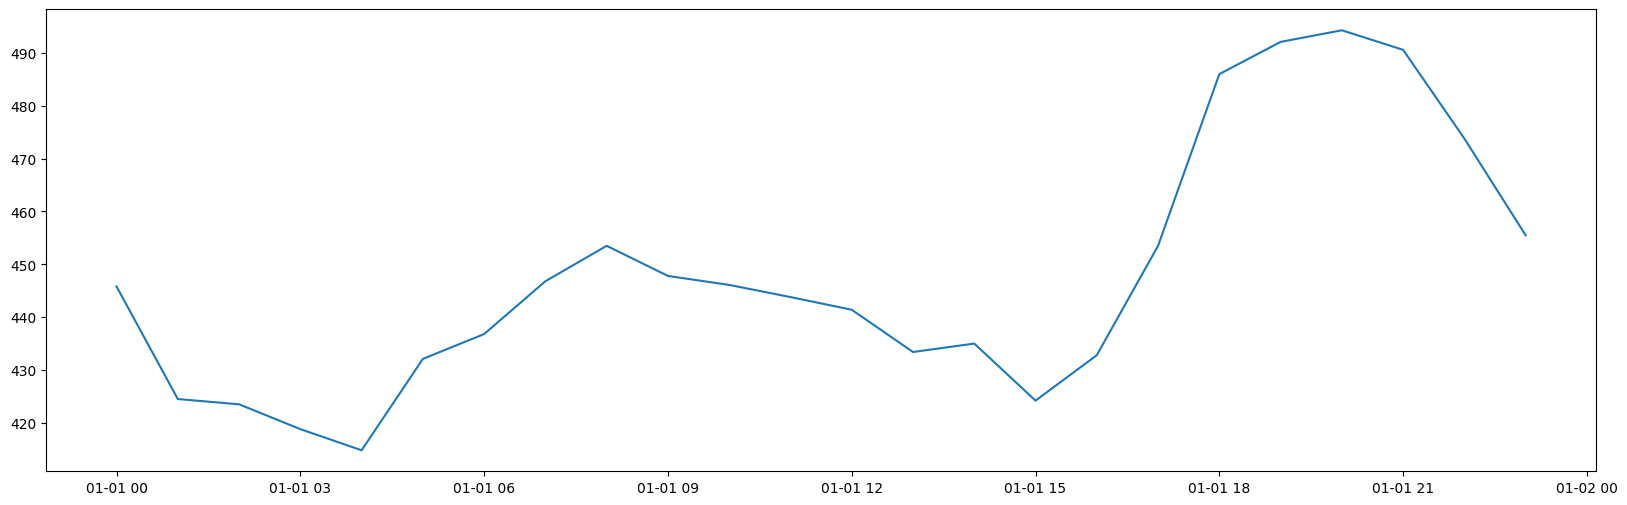

In [26]:

plt.figure(figsize=(20,6))
plt.plot(df_scatter_day['datetime'],df_scatter_day['Demand (MW)'])

In [27]:
df_demand_copy.reset_index(inplace=True)

In [28]:
df_demand_copy .head()

,datetime,Demand (MW),hour,day,month,year
0,2020-01-01 00:00:00,445.8,0,1,1,2020
1,2020-01-01 01:00:00,424.5,1,1,1,2020
2,2020-01-01 02:00:00,423.5,2,1,1,2020
3,2020-01-01 03:00:00,418.8,3,1,1,2020
4,2020-01-01 04:00:00,414.8,4,1,1,2020


In [29]:
df_demand_copy_1=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()


In [30]:
df_demand_copy_1

year  month  day
2020  1      1      447.787500
             2      523.025000
             3      518.770833
             4      506.100000
             5      491.412500
                       ...    
2023  2      17     556.016667
             18     484.712500
             19     415.495833
             20     457.445833
             21     474.950000
Name: Demand (MW), Length: 1148, dtype: float64

In [31]:
df_bar=df_demand_copy_1.unstack()

In [32]:
df_bar.head()

day                 1           2           3           4           5   \
year month                                                               
2020 1      447.787500  523.025000  518.770833  506.100000  491.412500   
     2      490.508333  465.941667  503.004167  512.895833  569.900000   
     3      458.858333  495.512500  504.187500  518.991667  520.033333   
     4      434.620833  428.937500  406.716667  369.062500  372.158333   
     5      406.712500  412.975000  419.495833  432.254167  419.383333   

day                 6           7           8           9           10  ...  \
year month                                                              ...   
2020 1      540.670833  551.441667  540.120833  532.958333  498.170833  ...   
     2      590.562500  584.541667  520.125000  502.266667  530.229167  ...   
     3      535.887500  489.516667  463.916667  504.412500  510.683333  ...   
     4      414.500000  450.870833  499.979167  407.387500  384.275000  ...   
     5      410.283333  408.462500  394.204167  370.091667  354.437500  ...   

day                 22          23          24          25          26  \
year month                                                               
2020 1      613.579167  574.391667  547.995833  527.962500  476.141667   
     2      514.887500  468.958333  524.366667  533.516667  568.808333   
     3      465.583333  466.833333  483.033333  474.358333  467.362500   
     4      502.775000  497.500000  474.608333  411.112500  378.420833   
     5      490.112500  502.145833  497.529167  546.654167  595.129167   

day                 27          28          29          30          31  
year month                                                              
2020 1      557.658333  579.887500  570.487500  565.875000  546.695833  
     2      565.233333  532.766667  495.454167         NaN         NaN  
     3      464.925000  454.433333  407.120833  431.670833  434.108333  
     4      420.112500  420.295833  419.887500  413.358333         NaN  
     5      525.104167  569.275000  528.854167  441.650000  426.950000  

[5 rows x 31 columns]

<Axes: xlabel='year,month'>

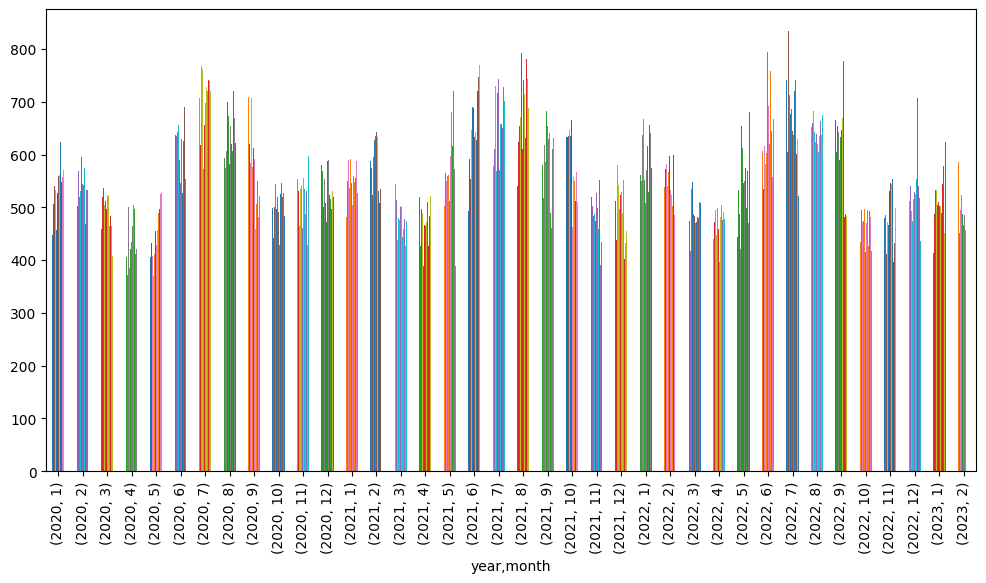

In [33]:
df_bar.plot.bar(figsize=(12,6),legend=False)

In [34]:
df.columns

Index(['Name', 'Temperature', 'feelslike', 'dewpoint', 'humidity',
       'precipitation', 'precipprob', 'preciptype', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddirection', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'uvindex', 'severerisk',
       'conditions', 'Demand(MW)'],
      dtype='object')

In [35]:
df=df[:27552]

In [36]:
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,Pokhara,38.0,34.4,29.0,69.76,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,445.8
2020-01-01 01:00:00,Pokhara,38.0,34.4,29.9,72.37,0.0,0,NaN,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,Overcast,424.5
2020-01-01 02:00:00,Pokhara,38.0,35.7,30.8,75.06,0.0,0,NaN,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,Overcast,423.5
2020-01-01 03:00:00,Pokhara,37.1,33.4,29.9,74.97,0.0,0,NaN,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,Partially cloudy,418.8
2020-01-01 04:00:00,Pokhara,35.1,32.3,29.0,78.41,0.0,0,NaN,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,Clear,414.8


In [37]:
correlations=[]
column_names=[]
for column_name in df.columns:
  if (df[column_name].dtype == 'float64') and (df[column_name].isna().sum()<=100 and column_name!='Demand(MW)') :
    correlation = df[column_name].corr(df['Demand(MW)'])
    correlations.append(correlation)
    column_names.append(column_name)
    print(f'{column_name}:{correlation}\n')

Temperature:0.44820260948487933

feelslike:0.4370061215167046

dewpoint:0.3630003358919944

humidity:-0.1871422045037993

precipitation:-0.011423298647801719

snow:0.015335090919222936

snowdepth:0.05362643712625413

windspeed:0.0487012652576177

winddirection:0.043991490051914786

sealevelpressure:-0.037037758587015114

cloudcover:-0.07416354728168802

visibility:0.08785313261932683

solarradiation:0.31111787450327083



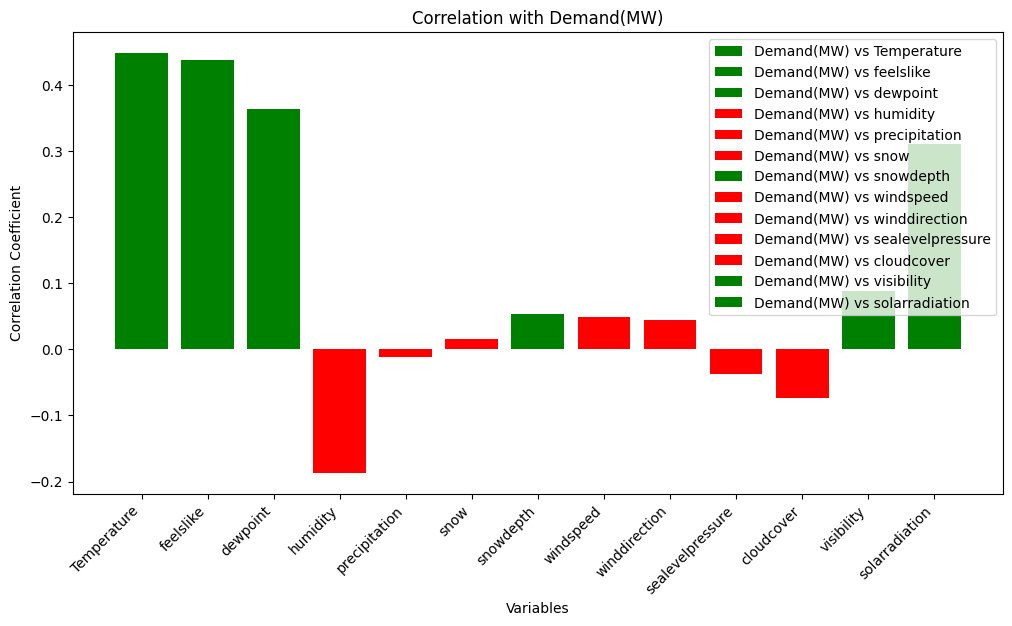

In [38]:
bar_colors = ['red' if correlation < abs(0.05) else 'green' for correlation in correlations]

# Plot the bar chart with color coding
plt.figure(figsize=(12, 6))
bars = plt.bar(column_names, correlations, color=bar_colors)
plt.title('Correlation with Demand(MW)')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')

# Add legend and change its position
plt.legend(bars, [f'Demand(MW) vs {column}' for column in column_names], loc='upper right')

plt.show()

In [39]:
column_names = [column_name for column_name in df.columns if (df[column_name].dtype == 'float64')
                                                        and (df[column_name].isna().sum() <= 100)
                                                        and (column_name != 'Demand(MW)')]
column_names

['Temperature',
 'feelslike',
 'dewpoint',
 'humidity',
 'precipitation',
 'snow',
 'snowdepth',
 'windspeed',
 'winddirection',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation']

In [40]:
# Anmol Update
df_scatter_day=df_demand_copy[:24]

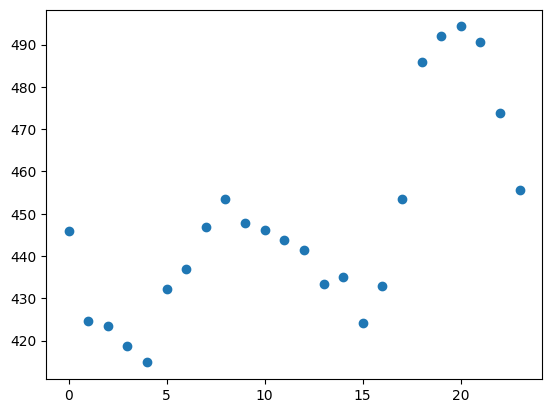

In [41]:
plt.scatter(df_scatter_day['hour'],df_scatter_day['Demand (MW)'])

In [42]:
df_demand_month=df_demand_copy.groupby(['year','month','day'])['Demand (MW)'].mean()[:30].reset_index()


In [43]:
df_demand_month.head()

,year,month,day,Demand (MW)
0,2020,1,1,447.787500
1,2020,1,2,523.025000
2,2020,1,3,518.770833
3,2020,1,4,506.100000
4,2020,1,5,491.412500


In [44]:
df_demand_month.shape

(30, 4)

([<matplotlib.axis.XTick at 0x7ab1a355fdc0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30')])

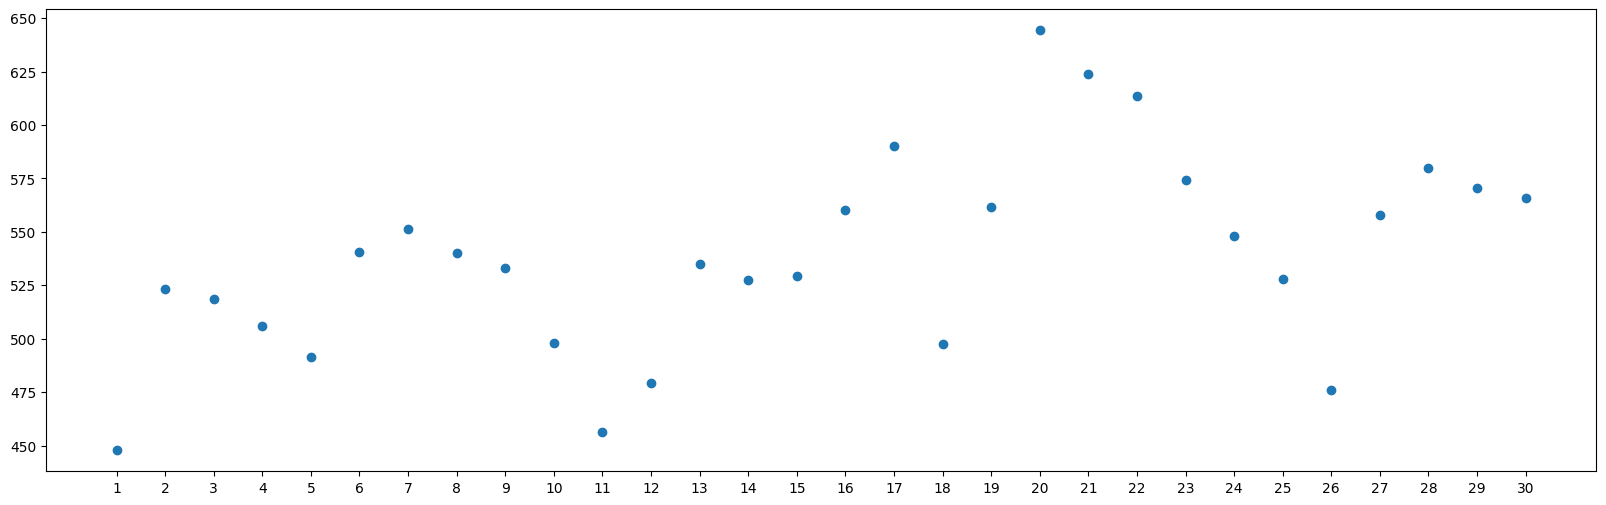

In [45]:
plt.figure(figsize=(20,6))
plt.scatter(df_demand_month['day'],df_demand_month['Demand (MW)'])
plt.xticks(df_demand_month['day'])

In [46]:
df_demand_year=df_demand_copy.groupby(['year','month'])['Demand (MW)'].mean().reset_index()

In [47]:
df_demand_year.head(38)
df_demand_year.loc[35:38]['year']

35    2022
36    2023
37    2023
Name: year, dtype: int64

In [48]:
# colors=['r','g','b']
# demand_values=[df_demand_year.loc[:11]['Demand (MW)'],df_demand_year.loc[12:23]['Demand (MW)'],df_demand_year.loc[24:35]['Demand (MW)']]
# labels = ['2020', '2021', '2022']
# plt.figure(figsize=(12,6))

# for i in range(3):
#     x_values = list(range(1, 13))
#     plt.plot(x_values, demand_values[i], c=colors[i], label=labels[i])
# plt.xticks(range(1,13))
# plt.legend()

In [49]:
# df_demand_copy.reset_index(inplace=True)


In [50]:
df_demand_copy.head()


,datetime,Demand (MW),hour,day,month,year
0,2020-01-01 00:00:00,445.8,0,1,1,2020
1,2020-01-01 01:00:00,424.5,1,1,1,2020
2,2020-01-01 02:00:00,423.5,2,1,1,2020
3,2020-01-01 03:00:00,418.8,3,1,1,2020
4,2020-01-01 04:00:00,414.8,4,1,1,2020


In [51]:
# # check for weekend


# def is_weekend(date_str):
#     # Convert the date string to a datetime object
#     date_obj = datetime.strptime(date_str, '%Y-%m-%d')

#     # Check if the day of the week is Saturday (5) or Sunday (6)
#     return date_obj.weekday() in [5, 6]

# # Example usage
# date_to_check = '2024-01-21'  # Replace with your date in 'YYYY-MM-DD' format
# if is_weekend(date_to_check):
#     print(f'{date_to_check} is a weekend.')
# else:
#     print(f'{date_to_check} is not a weekend.')

#### Convert String to Categories

In [52]:
# Find the columns which contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
preciptype
conditions


In [53]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [54]:
df.conditions.cat.categories

Index(['Clear', 'Freezing Drizzle/Freezing Rain, Ice, Overcast',
       'Freezing Drizzle/Freezing Rain, Overcast', 'Ice, Overcast', 'Overcast',
       'Partially cloudy', 'Rain', 'Rain, Overcast', 'Rain, Partially cloudy',
       'Snow, Freezing Drizzle/Freezing Rain, Ice, Overcast', 'Snow, Overcast',
       'Snow, Partially cloudy', 'Snow, Rain, Overcast',
       'Snow, Rain, Partially cloudy'],
      dtype='object')

In [55]:
pd.Categorical(df["conditions"]).codes

array([4, 4, 4, ..., 4, 4, 4], dtype=int8)

In [56]:
df.isna().sum()

Name                    0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype          24807
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
Demand(MW)              0
dtype: int64

In [57]:
df.preciptype.cat.codes[11422]

5

In [58]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # # Add binary column to indicate whether sample had missing value
        # df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [59]:
df.isna().sum()

Name                    0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype              0
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk          17766
conditions              0
Demand(MW)              0
dtype: int64

In [60]:
# missing values percentage
df['windgust'].isna().sum()/len(df)

0.5624637049941928

In [61]:
df_exp=df.copy()

In [62]:
melted_df=pd.melt(df_exp,id_vars=['conditions'],var_name=['windgust'])

In [63]:
melted_df

,conditions,windgust,value
0,5,Name,1.0
1,5,Name,1.0
2,5,Name,1.0
3,6,Name,1.0
4,1,Name,1.0
...,...,...,...
551035,6,Demand(MW),498.7
551036,6,Demand(MW),498.8
551037,5,Demand(MW),506.4
551038,5,Demand(MW),478.8


In [64]:
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,NaN,5,445.8
2020-01-01 01:00:00,1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,NaN,5,424.5
2020-01-01 02:00:00,1,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,NaN,5,423.5
2020-01-01 03:00:00,1,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,NaN,6,418.8
2020-01-01 04:00:00,1,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,NaN,1,414.8


In [65]:
df['severerisk'].fillna((df['severerisk'][17666:].median()),inplace=True)

In [66]:
df.head()

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,10.0,5,445.8
2020-01-01 01:00:00,1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,10.0,5,424.5
2020-01-01 02:00:00,1,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,10.0,5,423.5
2020-01-01 03:00:00,1,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,10.0,6,418.8
2020-01-01 04:00:00,1,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,10.0,1,414.8


In [67]:
df.isna().sum()

Name                    0
Temperature             0
feelslike               0
dewpoint                0
humidity                0
precipitation           0
precipprob              0
preciptype              0
snow                   18
snowdepth              18
windgust            15497
windspeed               0
winddirection           0
sealevelpressure       18
cloudcover              0
visibility             18
solarradiation          0
uvindex                 0
severerisk              0
conditions              0
Demand(MW)              0
dtype: int64

In [68]:
df_exp=df.copy()
df_exp

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,10.0,5,445.8
2020-01-01 01:00:00,1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,10.0,5,424.5
2020-01-01 02:00:00,1,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,10.0,5,423.5
2020-01-01 03:00:00,1,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,10.0,6,418.8
2020-01-01 04:00:00,1,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,10.0,1,414.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 19:00:00,1,50.0,49.4,29.0,44.19,0.0,0,0,0.0,0.0,...,3.4,100.0,1009.1,50.0,9.9,0.0,0,10.0,6,498.7
2023-02-21 20:00:00,1,50.0,49.4,28.1,42.59,0.0,0,0,0.0,0.0,...,3.4,110.0,1008.1,88.9,9.9,0.0,0,10.0,6,498.8
2023-02-21 21:00:00,1,53.1,53.1,26.1,34.92,0.0,0,0,0.0,0.0,...,5.8,130.0,1007.3,100.0,9.9,0.0,0,10.0,5,506.4


### Preprocessing date time column to extract year month day and hour

In [69]:

def preprocess_data(data):
    data.reset_index(inplace=True)
    data["Year"] = data.datetime.dt.year
    data["Month"] = data.datetime.dt.month
    data["Day"] = data.datetime.dt.day
    data["Hour"] = data.datetime.dt.hour
    data=data.drop("datetime",axis=1, inplace=True)


### Splitting the data into valid/train sets

In [70]:
df

,Name,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,...,windspeed,winddirection,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW)
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.4,100.0,9.9,0.0,0,10.0,5,445.8
2020-01-01 01:00:00,1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,...,4.7,230.0,1015.3,100.0,9.9,0.0,0,10.0,5,424.5
2020-01-01 02:00:00,1,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,...,3.4,230.0,1015.4,100.0,9.9,0.0,0,10.0,5,423.5
2020-01-01 03:00:00,1,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,...,4.7,220.0,1015.3,88.9,9.9,0.0,0,10.0,6,418.8
2020-01-01 04:00:00,1,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,...,3.4,240.0,1015.2,0.0,9.9,0.0,0,10.0,1,414.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-21 19:00:00,1,50.0,49.4,29.0,44.19,0.0,0,0,0.0,0.0,...,3.4,100.0,1009.1,50.0,9.9,0.0,0,10.0,6,498.7
2023-02-21 20:00:00,1,50.0,49.4,28.1,42.59,0.0,0,0,0.0,0.0,...,3.4,110.0,1008.1,88.9,9.9,0.0,0,10.0,6,498.8
2023-02-21 21:00:00,1,53.1,53.1,26.1,34.92,0.0,0,0,0.0,0.0,...,5.8,130.0,1007.3,100.0,9.9,0.0,0,10.0,5,506.4


In [71]:
df_exp = df_exp.drop("Name", axis=1)

df_exp = df_exp.drop("windgust", axis=1)


In [72]:
preprocess_data(df_exp)

In [73]:
df_exp.head()

,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,snowdepth,windspeed,...,visibility,solarradiation,uvindex,severerisk,conditions,Demand(MW),Year,Month,Day,Hour
0,38.0,34.4,29.0,69.76,0.0,0,0,0.0,0.0,4.7,...,9.9,0.0,0,10.0,5,445.8,2020,1,1,0
1,38.0,34.4,29.9,72.37,0.0,0,0,0.0,0.0,4.7,...,9.9,0.0,0,10.0,5,424.5,2020,1,1,1
2,38.0,35.7,30.8,75.06,0.0,0,0,0.0,0.0,3.4,...,9.9,0.0,0,10.0,5,423.5,2020,1,1,2
3,37.1,33.4,29.9,74.97,0.0,0,0,0.0,0.0,4.7,...,9.9,0.0,0,10.0,6,418.8,2020,1,1,3
4,35.1,32.3,29.0,78.41,0.0,0,0,0.0,0.0,3.4,...,9.9,0.0,0,10.0,1,414.8,2020,1,1,4


In [86]:
# Step 1: Split into training and temporary set (70% training, 30% temporary set)
train_data, temp_set = train_test_split(df_exp, test_size=0.3, random_state=42)

# Step 2: Split the temporary set into validation and test sets (20% for test)
valid_data, test_data = train_test_split(temp_set, test_size=0.2, random_state=42)


In [87]:
train_data.shape, valid_data.shape, test_data.shape

((19286, 23), (6612, 23), (1654, 23))

#### Now we have training data and validation data. So we can create x_train & x_valid as input features and y_train & y_valid as output labels

In [88]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
x_train,y_train=train_data.drop("Demand(MW)",axis=1),train_data['Demand(MW)']
x_valid,y_valid=valid_data.drop("Demand(MW)",axis=1),valid_data['Demand(MW)']
x_test,y_test=test_data.drop("Demand(MW)",axis=1),test_data['Demand(MW)']

In [90]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((19286, 22), (19286,), (6612, 22), (6612,))

In [91]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [92]:
model = XGBRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [93]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:47:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: user 833 ms, sys: 35.5 ms, total: 869 ms
Wall time: 498 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             max_samples=10000, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [96]:
show_scores(model)

{'Training MAE': 16.54064646231044,
 'Valid MAE': 22.857554584925488,
 'Training RMSLE': 0.041254405488204755,
 'Valid RMSLE': 0.055015593004669565,
 'Training R^2': 0.963068689846376,
 'Valid R^2': 0.9288308408038727}

In [97]:

list=model.predict(x_test)

In [98]:
list

array([423.4661 , 468.28973, 392.46378, ..., 536.388  , 718.89954,
       580.58887], dtype=float32)

### Hyerparameter tuning with RandomizedSearchCV

In [99]:
%%time

# Different RandomForestRegressor hyperparameters
# buiding parameter grid
param_grid = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': [0, 1e-5, 1e-2, 0.1, 1, 100],
    'reg_lambda': [0, 1e-5, 1e-2, 0.1, 1, 100]
}


CPU times: user 4.24 ms, sys: 0 ns, total: 4.24 ms
Wall time: 4.26 ms


In [100]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Use the appropriate metric for your task
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available processors
)

In [101]:
# Perform the RandomizedSearchCV
random_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:49:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_samples" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab1a0a79f90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ab1a0e46530>,
                                        'reg_alpha': [0, 1e-05, 0.01, 0.1, 1,
                                                      100],
                                        'reg_lambda': [0, 1e-05, 0.01, 0.1, 1,
                                                       100],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ab1a0a78c10>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [102]:
# Get the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [103]:
# Print the best parameters
print("Best Parameters:")
print(best_params)


Best Parameters:
{'colsample_bytree': 0.7693605922825478, 'learning_rate': 0.1284644554526709, 'max_depth': 9, 'n_estimators': 188, 'reg_alpha': 0.01, 'reg_lambda': 0, 'subsample': 0.88453678109946}


In [104]:
#Access the best model and use it for predictions
predictions = best_model.predict(x_test)

In [105]:
show_scores(best_model)

{'Training MAE': 4.897386589552696,
 'Valid MAE': 19.261537206410928,
 'Training RMSLE': 0.012503536984864057,
 'Valid RMSLE': 0.04718132195892298,
 'Training R^2': 0.9967342900220016,
 'Valid R^2': 0.9454826062137168}

In [106]:
df_for_prediction=pd.read_csv('/content/drive//My Drive/Documents and Data for forecasting LOCUS/Demand Forecasting/Demand Forecasting Weather Data upto Feb 28.csv')

In [112]:
list=df_for_prediction[27719:]

In [113]:
list

,Name,datetime,Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,preciptype,snow,...,visibility,solarradiation,uvindex,severerisk,conditions,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
27719,Pokhara,2/28/2023 23:00,53.1,53.1,41.0,63.45,0.0,0,NaN,0.0,...,9.9,0.0,0,10.0,Clear,NaN,NaN,NaN,NaN,NaN


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Name: object, datetime: object, preciptype: object, conditions: object, Unnamed: 25: object

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Demand(MW)).

In [115]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

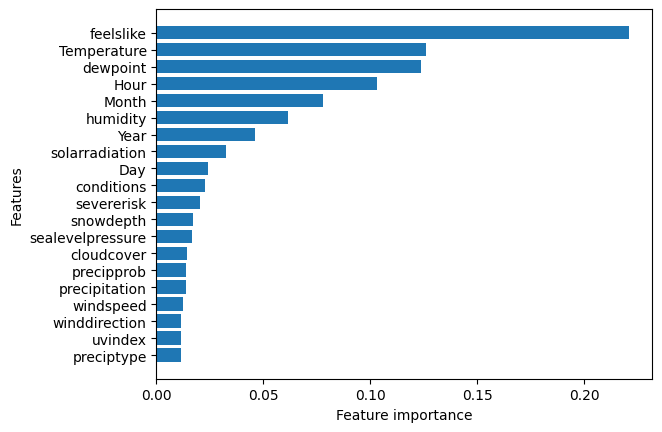

In [116]:
plot_features(x_train.columns, best_model.feature_importances_)

**Note**: Feature importances can be used for feature selection, aiding in the identification of relevant features. Eliminating less important features can simplify the model, reduce overfitting and improve generalization. If certain features are found to be highly important, it can guide future data collection efforts on such features (like temperature in this case) to be more detailed or accurate so that it can improve model performance.